# **TASK 2 :  MOVIE RATING PREDICTION WITH PYTHON**

In [131]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#Loading the dataset with latin1 encoding
movies_data = pd.read_csv('/content/IMDb Movies India.csv',  encoding='latin1')

In [133]:
# Data Exploration
movies_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [134]:
movies_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [135]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [136]:
#Checking NULL Values
movies_data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [137]:
# Data Cleaning
# Drop rows where 'Rating' is missing since that is our target variable
movie_data_cleaned = movies_data.dropna(subset=['Rating'])

In [138]:
# Fill missing values in categorical columns with 'Unknown' using .loc
movie_data_cleaned.loc[:, 'Genre'] = movie_data_cleaned['Genre'].fillna('Unknown')
movie_data_cleaned.loc[:, 'Director'] = movie_data_cleaned['Director'].fillna('Unknown')
movie_data_cleaned.loc[:, 'Actor 1'] = movie_data_cleaned['Actor 1'].fillna('Unknown')
movie_data_cleaned.loc[:, 'Actor 2'] = movie_data_cleaned['Actor 2'].fillna('Unknown')
movie_data_cleaned.loc[:, 'Actor 3'] = movie_data_cleaned['Actor 3'].fillna('Unknown')


In [139]:
# Convert 'Votes' column to numeric, coercing errors to handle any non-numeric values
movie_data_cleaned.loc[:, 'Votes'] = pd.to_numeric(movie_data_cleaned['Votes'], errors='coerce').fillna(0)

In [140]:
# Convert 'Year' to numeric and fill missing values with a placeholder (e.g., 0)
movie_data_cleaned.loc[:, 'Year'] = pd.to_numeric(movie_data_cleaned['Year'], errors='coerce').fillna(0)

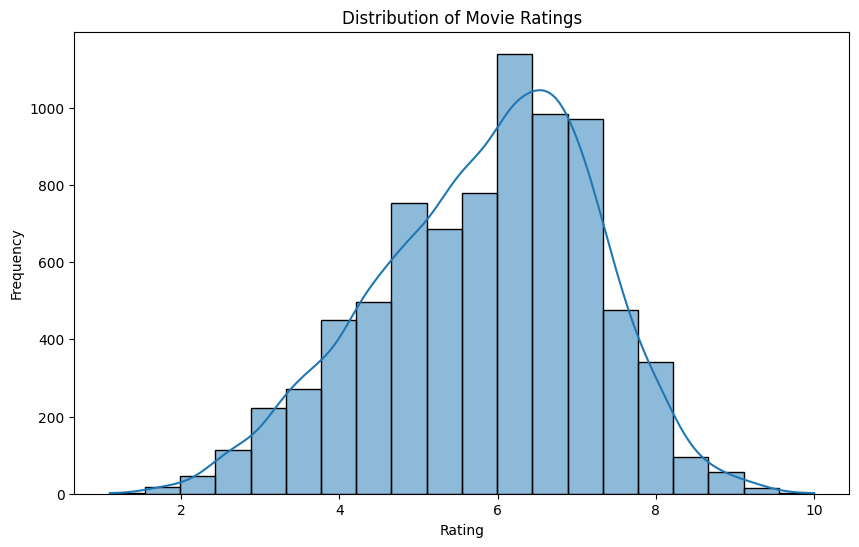

In [141]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(movie_data_cleaned['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [142]:
# Feature Engineering
# Manual Target Encoding based on average ratings
genre_mean = movie_data_cleaned.groupby('Genre')['Rating'].mean()
director_mean = movie_data_cleaned.groupby('Director')['Rating'].mean()
actor1_mean = movie_data_cleaned.groupby('Actor 1')['Rating'].mean()
actor2_mean = movie_data_cleaned.groupby('Actor 2')['Rating'].mean()
actor3_mean = movie_data_cleaned.groupby('Actor 3')['Rating'].mean()

In [143]:
movie_data_cleaned = movie_data_cleaned.copy()
# Encode the features
movie_data_cleaned['Genre_Encoded'] = movie_data_cleaned['Genre'].map(genre_mean)
movie_data_cleaned['Director_Encoded'] = movie_data_cleaned['Director'].map(director_mean)
movie_data_cleaned['Actor1_Encoded'] = movie_data_cleaned['Actor 1'].map(actor1_mean)
movie_data_cleaned['Actor2_Encoded'] = movie_data_cleaned['Actor 2'].map(actor2_mean)
movie_data_cleaned['Actor3_Encoded'] = movie_data_cleaned['Actor 3'].map(actor3_mean)

In [144]:
# Drop original categorical columns
movie_data_encoded = movie_data_cleaned.drop(columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

In [145]:
# Selecting features and target variable
X = movie_data_encoded[['Year', 'Votes', 'Genre_Encoded', 'Director_Encoded', 'Actor1_Encoded', 'Actor2_Encoded', 'Actor3_Encoded']]
y = movie_data_encoded['Rating']


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [148]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
# Model Building
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [150]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [151]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [152]:
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.40432963766133556
Root Mean Squared Error: 0.6358691985474179
R-squared: 0.7825185194946126


In [153]:
# Sorting the dataset by 'Rating' in descending order to get the top movies
top_10_movies = movie_data_cleaned.sort_values(by='Rating', ascending=False).head(10)

In [154]:
# Select the 'Name' and 'Rating' columns to display the movie names along with their ratings
top_10_movies = top_10_movies[['Name', 'Rating']]

In [155]:
# Display the top 10 movies
print("Top 10 Movies based on Rating:")
print(top_10_movies)

Top 10 Movies based on Rating:
                      Name  Rating
8339       Love Qubool Hai    10.0
5410            Half Songs     9.7
2563                 Breed     9.6
11704             Ram-Path     9.4
14222  The Reluctant Crime     9.4
6852                  June     9.4
5077          Gho Gho Rani     9.4
1314          Ashok Vatika     9.3
5125           God of gods     9.3
12673   Secrets of Sinauli     9.3


In [156]:
#predicts the rating of a movie based on features like genre, director, and actors.

In [157]:
# Select the same features as during training
X_new = new_movie_df[['Year', 'Votes', 'Genre_Encoded', 'Director_Encoded', 'Actor1_Encoded', 'Actor2_Encoded', 'Actor3_Encoded']]

In [158]:
# Convert the DataFrame to a NumPy array
X_new_array = X_new.values

In [159]:
# Predict the rating using the trained model
predicted_rating = model.predict(X_new_array)

print(f"Predicted Rating for the new movie: {predicted_rating[0]:.2f}")

Predicted Rating for the new movie: 5.93
